## Health Care: Activity1_Case Study

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd


In [13]:
file1 = pd.read_csv('file1.csv')
file1

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
file1 = pd.read_csv('file1.csv')
print(file1.head())
print(file1.tail())
file1.columns=[i.lower() for i in file1.columns]
#print(file1.tail())

  Customer          ST GENDER             Education Customer Lifetime Value  \
0  RB50392  Washington    NaN                Master                     NaN   
1  QZ44356     Arizona      F              Bachelor              697953.59%   
2  AI49188      Nevada      F              Bachelor             1288743.17%   
3  WW63253  California      M              Bachelor              764586.18%   
4  GA49547  Washington      M  High School or Below              536307.65%   

    Income  Monthly Premium Auto Number of Open Complaints     Policy Type  \
0      0.0                1000.0                    1/0/00   Personal Auto   
1      0.0                  94.0                    1/0/00   Personal Auto   
2  48767.0                 108.0                    1/0/00   Personal Auto   
3      0.0                 106.0                    1/0/00  Corporate Auto   
4  36357.0                  68.0                    1/0/00   Personal Auto   

   Vehicle Class  Total Claim Amount  
0  Four-Door Car 

In [15]:
file2 = pd.read_csv('file2.csv')
file2 =pd.DataFrame(file2)
print(file2.head())
file2.columns=[i.lower() for i in file2.columns]
print(file2.tail())

  Customer          ST GENDER Education Customer Lifetime Value  Income  \
0  GS98873     Arizona      F  Bachelor              323912.47%   16061   
1  CW49887  California      F    Master              462680.11%   79487   
2  MY31220  California      F   College              899704.02%   54230   
3  UH35128      Oregon      F   College             2580706.30%   71210   
4  WH52799     Arizona      F   College              380812.21%   94903   

   Monthly Premium Auto Number of Open Complaints  Total Claim Amount  \
0                    88                    1/0/00               633.6   
1                   114                    1/0/00               547.2   
2                   112                    1/0/00               537.6   
3                   214                    1/1/00              1027.2   
4                    94                    1/0/00               451.2   

      Policy Type  Vehicle Class  
0   Personal Auto  Four-Door Car  
1    Special Auto            SUV  
2   P

In [16]:
file3 = pd.read_csv('file3.csv')
file3 =pd.DataFrame(file3)
print(file3.head())
file3.columns=[i.lower() for i in file3.columns]#file3.rename[columns]
print(file3.tail())

  Customer       State  Customer Lifetime Value             Education Gender  \
0  SA25987  Washington              3479.137523  High School or Below      M   
1  TB86706     Arizona              2502.637401                Master      M   
2  ZL73902      Nevada              3265.156348              Bachelor      F   
3  KX23516  California              4455.843406  High School or Below      F   
4  FN77294  California              7704.958480  High School or Below      M   

   Income  Monthly Premium Auto  Number of Open Complaints    Policy Type  \
0       0                   104                          0  Personal Auto   
1       0                    66                          0  Personal Auto   
2   25820                    82                          0  Personal Auto   
3       0                   121                          0  Personal Auto   
4   30366                   101                          2  Personal Auto   

   Total Claim Amount  Vehicle Class  
0          499.20

In [17]:
#standardizing headers
file1.rename(columns = {"st":"state", "GENDER":"gender","Customer":"customer", "Education":"education","Customer Lifetime Value":"customer_lifetime_value","Income":"income",
                          "Monthly Premium Auto":"monthly_premium_auto","Number of Open Complaints":"number_of_open_complaints","Policy Type":"policy_type","Vehicle Class":"vehicle_class", "Total Claim Amount":"total_claim_amount"}, inplace=True)
file2.rename(columns = {"st":"state", "GENDER":"gender","Customer":"customer", "Education":"education","Customer Lifetime Value":"customer_lifetime_value","Income":"income",
                          "Monthly Premium Auto":"monthly_premium_auto","Number of Open Complaints":"number_of_open_complaints","Policy Type":"policy_type","Vehicle Class":"vehicle_class", "Total Claim Amount":"total_claim_amount"}, inplace=True)
file3.rename(columns = {"State":"state", "Gender":"gender","Customer":"customer", "Education":"education","Customer Lifetime Value":"customer_lifetime_value","Income":"income",
                          "Monthly Premium Auto":"monthly_premium_auto","Number of Open Complaints":"number_of_open_complaints","Policy Type":"policy_type","Vehicle Class":"vehicle_class", "Total Claim Amount":"total_claim_amount"}, inplace=True)


In [18]:
#concatinate the 3 files into 1 file
file4 = pd.concat([file1, file2,file3], axis=0)
print(len(file1))
print(len(file2))
print(len(file3))
print(len(file4))
print(file4.head())
file4

4008
996
7070
12074
  customer       state gender             education customer lifetime value  \
0  RB50392  Washington    NaN                Master                     NaN   
1  QZ44356     Arizona      F              Bachelor              697953.59%   
2  AI49188      Nevada      F              Bachelor             1288743.17%   
3  WW63253  California      M              Bachelor              764586.18%   
4  GA49547  Washington      M  High School or Below              536307.65%   

    income  monthly premium auto number of open complaints     policy type  \
0      0.0                1000.0                    1/0/00   Personal Auto   
1      0.0                  94.0                    1/0/00   Personal Auto   
2  48767.0                 108.0                    1/0/00   Personal Auto   
3      0.0                 106.0                    1/0/00  Corporate Auto   
4  36357.0                  68.0                    1/0/00   Personal Auto   

   vehicle class  total claim amount

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [19]:
#replace spaces with "_"
file4.columns = file4.columns.str.replace(" ", "_")
file4

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [20]:
file4 = file4.drop_duplicates()
file4

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [29]:
#Working with data types – Check the data types of all the columns and fix the incorrect ones (for ex. customer lifetime value and number of open complaints ). Hint: remove the percentage from the customer lifetime value and truncate it to an integer value.

#Check the data types of all the columns
#file4.dtypes

dfc=file4
dfc
#dfc['customer_lifetime_value'].replace({"%",""},regex=True)#does not works
dfc['customer_lifetime_value'] = dfc['customer_lifetime_value'].str.replace('%', '')#works
#dfc
#round(dfc.isna().sum()/len(hk_df),4)*100
#round(dfc['customer_lifetime_value'],1)
#dfc['customer_lifetime_value'] = np.round(dfc['customer_lifetime_value'], decimals = 1)

#remove the percentage from the customer lifetime value and truncate it to an integer value.

#Convert Nan to an integer/float
dfc['customer_lifetime_value'] = dfc['customer_lifetime_value'].fillna(0).astype(float).round()#.apply(np.ceil)
dfc





/var/folders/vb/vbrmp7kd05b1_r2ys6nlpk300000gn/T/ipykernel_62179/1039951511.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['customer_lifetime_value'] = dfc['customer_lifetime_value'].str.replace('%', '')#works
/var/folders/vb/vbrmp7kd05b1_r2ys6nlpk300000gn/T/ipykernel_62179/1039951511.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc['customer_lifetime_value'] = dfc['customer_lifetime_value'].fillna(0).astype(float).round()#.apply(np.ceil)


,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,0.0,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697954.0,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.0,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.0,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536308.0,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,0.0,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,0.0,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,0.0,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,0.0,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [30]:
#Extract 0 between / string, in column_of_open_complains
#number of open complaints should be numeric or float
dfb=dfc

#convert everything into a string so we can iterate through it
dfb[ 'number_of_open_complaints'].fillna("0")
#df.fillna({1:0}, inplace=True)

#dfb['number_of_open_complaints'] = dfb['number_of_open_complaints'].replace(np.nan, 0)

#dfb['number of open complaints'].astype(str)
#dfb['number of open complaints'].apply(type).value_counts()
   

#dfb['number_of_open_complaints'] =  pd.to_numeric(df['number_of_open_complaints'], errors='coerce')
#print(dfb.dtypes)
dfb

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,0.0,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697954.0,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.0,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.0,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536308.0,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,0.0,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,0.0,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,0.0,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,0.0,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [31]:
def extract_number (x):
    if isinstance(x, str) and "/" in x:
        return x.split('/')[1]
    elif x == np.nan:
        pass
    else:
        return x
dfb

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,0.0,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697954.0,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.0,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.0,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536308.0,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,0.0,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,0.0,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,0.0,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,0.0,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [32]:
#using a lambda function would prevent us from having to convert everything into a string.
#lambda x: x.split('/')[1]
dfc
#convert everything back into an integer
dfb['number_of_open_complaints'].astype(str)
dfb['number_of_open_complaints'] =dfb['number_of_open_complaints'].apply(extract_number)
#dfb['number_of_open_complaints'] = pd.to_numeric(dfb[ 'number_of_open_complaints'], errors='coerce')
#dfb['number_of_open_complaints'].apply(type).value_counts()
#dfb['number_of_open_complaints'].unique()
dfb

/var/folders/vb/vbrmp7kd05b1_r2ys6nlpk300000gn/T/ipykernel_62179/4065366525.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb['number_of_open_complaints'] =dfb['number_of_open_complaints'].apply(extract_number)


,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,0.0,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697954.0,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.0,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.0,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536308.0,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,0.0,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,PK87824,California,F,College,0.0,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,TD14365,California,M,Bachelor,0.0,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,UP19263,California,M,College,0.0,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [33]:
#Deleting and rearranging columns – delete the column customer as it is only a unique identifier for each row of data
dfb.drop(columns=['customer'], inplace=True)
dfb

/var/folders/vb/vbrmp7kd05b1_r2ys6nlpk300000gn/T/ipykernel_62179/2125307303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfb.drop(columns=['customer'], inplace=True)


,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,NaN,Master,0.0,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697954.0,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.0,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.0,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536308.0,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,0.0,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,F,College,0.0,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,M,Bachelor,0.0,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,M,College,0.0,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [34]:
# Filtering data and Correcting typos – Filter the data in state and gender column to standardize the texts in those columns
dfbi=dfc
dfbi['state'].unique()


array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [74]:
#clean function for state column
def clean_data(i):
    if i == 'AZ':
        i = 'Arizona'
    elif i == 'WA':
        i = 'Washington'
    elif i == 'Cali':
        i = 'California'
    return i

In [75]:
#cleaned state
dfbi["state"] = list(map(clean_data, dfbi["state"]))
dfbi['state'].unique()


/var/folders/vb/vbrmp7kd05b1_r2ys6nlpk300000gn/T/ipykernel_62179/3681453082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbi["state"] = list(map(clean_data, dfbi["state"]))


array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', nan],
      dtype=object)

In [37]:
dfbii=dfbi
dfbii['gender'].unique()


array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [40]:
#clean function for gender column
def clean_data2(i):
    if i == 'F':
        i = 'Female'
    elif i == 'Femal':
        i = 'Female'
    elif i == 'female':
        i = 'Female'
    elif i == 'M':
        i = 'Male'
    return i

In [41]:
#cleaned state
dfbi["gender"] = list(map(clean_data2, dfbi["gender"]))
dfbi['gender'].unique()

/var/folders/vb/vbrmp7kd05b1_r2ys6nlpk300000gn/T/ipykernel_62179/3928327740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbi["gender"] = list(map(clean_data2, dfbi["gender"]))


array([nan, 'Female', 'Male'], dtype=object)

## Health Care: Activity2_Case Study - WEEK2, DAY2

In [42]:
df2=dfbi

#Replacing null values – Replace missing values with means of the column (for numerical columns). 
#Pay attention that the Income feature for instance has 0s which is equivalent to null values. 
#(We assume here that there is no such income with 0 as it refers to missing values) 
#Hint: numpy.nan is considered of float64 data type.

In [43]:
df2['income'].unique
df2['customer_lifetime_value'] = df2['customer_lifetime_value'].fillna(0).astype(float).round()
df2['income'] = df2['income'].fillna(df2['income'].mean())
df2

/var/folders/vb/vbrmp7kd05b1_r2ys6nlpk300000gn/T/ipykernel_62179/3629327045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['customer_lifetime_value'] = df2['customer_lifetime_value'].fillna(0).astype(float).round()
/var/folders/vb/vbrmp7kd05b1_r2ys6nlpk300000gn/T/ipykernel_62179/3629327045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['income'] = df2['income'].fillna(df2['income'].mean())


,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,Washington,NaN,Master,0.0,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,697954.0,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,1288743.0,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,764586.0,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,536308.0,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,California,Male,Bachelor,0.0,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,California,Female,College,0.0,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,California,Male,Bachelor,0.0,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,California,Male,College,0.0,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [44]:
df2['customer_lifetime_value'] = df2['customer_lifetime_value'].fillna(df2['customer_lifetime_value'].mean())



/var/folders/vb/vbrmp7kd05b1_r2ys6nlpk300000gn/T/ipykernel_62179/1116072096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['customer_lifetime_value'] = df2['customer_lifetime_value'].fillna(df2['customer_lifetime_value'].mean())


Bucketing the data - Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

In [45]:
def replace(i):
    if i == "California":
        return "West Region"
    elif i == "Oregon":
        return "North West"
    elif i == "Washington":
        return "East"
    elif i == "Arizona" or "Nevada":
        return "Central"
    else:
        return i

In [46]:
df2 = df2.rename(columns={'state': 'region'})
df2["region"] = list(map(replace, df2["region"]))
df2

,region,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,East,NaN,Master,0.0,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,Central,Female,Bachelor,697954.0,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,Central,Female,Bachelor,1288743.0,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,West Region,Male,Bachelor,764586.0,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,East,Male,High School or Below,536308.0,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,West Region,Male,Bachelor,0.0,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,West Region,Female,College,0.0,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,West Region,Male,Bachelor,0.0,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,West Region,Male,College,0.0,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


(Optional) In the column Vehicle Class, merge the two categories Luxury SUV and Luxury Car into one category named Luxury Vehicle



In [47]:
df2["vehicle_class"].unique()


array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car', nan], dtype=object)

In [48]:
def luxury_name(i):
    if i in ['Luxury SUV', 'Luxury Car']:
        return 'Luxury Vehicle'
    else:
        return i


In [49]:
df2["vehicle_class"] = list(map(luxury_name, df2["vehicle_class"]))

df2["vehicle_class"].unique()

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury Vehicle',
       'Sports Car', nan], dtype=object)

My additional optiona excercise: In the column Vehicle Class, categories Sports Car into one SUV

In [349]:
def suv(i):
    if i in ['Sports Car']:
        return 'SUV'
    else:
        return i
    

In [350]:
df2["vehicle_class"] = list(map(suv, df2["vehicle_class"]))

df2["vehicle_class"].unique()


array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury Vehicle', nan],
      dtype=object)

### Day2_Week2
### Activity 3 (Wednesday)
As a reminder the objective of this study is to predict the `total claim amount` of a customer and study/investigate the impact of the factors (input features) on the target variable(`total claim amount`). That means in your exploratory data analysis, you have to look for patterns in this data that shows interesting relationships among the input features as well as with relation to the target feature.
- Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms.
  - Do the distributions for different numerical variables look like a normal distribution? 
- For the numerical variables, check for correlation between the input features. Note: this does not include the target feature.
- Plot the Correlation Heatmap.
- (Optional): Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




,region,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,East,NaN,Master,0.0,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934
1,Central,Female,Bachelor,697954.0,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935
2,Central,Female,Bachelor,1288743.0,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247
3,West Region,Male,Bachelor,764586.0,0.0,106.0,0,Corporate Auto,SUV,529.881344
4,East,Male,High School or Below,536308.0,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
7065,West Region,Male,Bachelor,0.0,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
7066,West Region,Female,College,0.0,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
7067,West Region,Male,Bachelor,0.0,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
7068,West Region,Male,College,0.0,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [135]:
mdf = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
mdf

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [136]:
df2['total_claim_amount'].unique

<bound method Series.unique of 0          2.704934
1       1131.464935
2        566.472247
3        529.881344
4         17.269323
           ...     
7065     198.234764
7066     379.200000
7067     790.784983
7068     691.200000
7069     369.600000
Name: total_claim_amount, Length: 9135, dtype: float64>

In [137]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [138]:
#Gategorical columns versus total_claim_amount column
#region
#gender
#education
#policy_type
#vehicle_class

#class_survival = titanic.groupby(['class','alive'])['survived'].count().reset_index()
#class_survival
exp1 = df2.groupby(['region','gender','education','policy_type','vehicle_class'])['total_claim_amount'].count().reset_index()
exp1

,region,gender,education,policy_type,vehicle_class,total_claim_amount
0,Central,Female,Bachelor,Corporate Auto,Four-Door Car,40
1,Central,Female,Bachelor,Corporate Auto,Luxury Vehicle,4
2,Central,Female,Bachelor,Corporate Auto,SUV,17
3,Central,Female,Bachelor,Corporate Auto,Sports Car,3
4,Central,Female,Bachelor,Corporate Auto,Two-Door Car,10
...,...,...,...,...,...,...
467,West Region,Male,Master,Personal Auto,Sports Car,9
468,West Region,Male,Master,Personal Auto,Two-Door Car,21
469,West Region,Male,Master,Special Auto,Four-Door Car,1
470,West Region,Male,Master,Special Auto,SUV,1


In [139]:
exp2 = df2.groupby(['region','gender'])['total_claim_amount'].count().reset_index()
exp2

,region,gender,total_claim_amount
0,Central,Female,1315
1,Central,Male,1238
2,East,Female,414
3,East,Male,376
4,North West,Female,1312
5,North West,Male,1245
6,West Region,Female,1563
7,West Region,Male,1549


In [140]:
exp3 = df2.groupby(['gender'])['total_claim_amount'].count().reset_index()
exp3

,gender,total_claim_amount
0,Female,4604
1,Male,4408


In [141]:
exp4 = df2.groupby(['education','gender'])['total_claim_amount'].count().reset_index()
exp4#need to correct the typo in bachelors

,education,gender,total_claim_amount
0,Bachelor,Female,1394
1,Bachelor,Male,1305
2,College,Female,1345
3,College,Male,1301
4,Doctor,Female,169
5,Doctor,Male,173
6,High School or Below,Female,1307
7,High School or Below,Male,1277
8,Master,Female,389
9,Master,Male,352


In [142]:
def bachelor_name(i):
    if i in ['', 'Bachelors']:
        return 'Bachelor'
    else:
        return i
df2["education"] = list(map(bachelor_name, df2["education"]))


In [143]:
exp4 = df2.groupby(['education','gender'])['total_claim_amount'].count().reset_index()
exp4#need to correct the typo in bachelors

,education,gender,total_claim_amount
0,Bachelor,Female,1394
1,Bachelor,Male,1305
2,College,Female,1345
3,College,Male,1301
4,Doctor,Female,169
5,Doctor,Male,173
6,High School or Below,Female,1307
7,High School or Below,Male,1277
8,Master,Female,389
9,Master,Male,352


<AxesSubplot:title={'center':'Total_Claim_Amount by Education'}, xlabel='total_claim_amount', ylabel='education'>

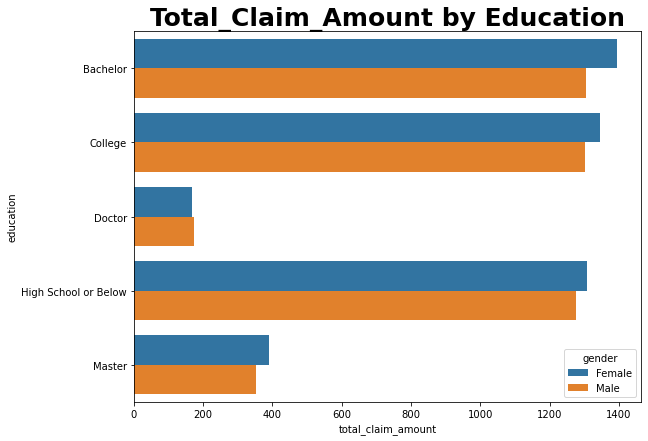

In [144]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title('Total_Claim_Amount by Education', size='25', fontweight='bold')

sns.barplot(x = exp4['total_claim_amount'],y = exp4['education'], hue = exp4['gender'])
#sns.barplot(x = exp4['total_claim_amount'],y = exp4['education'], hue = exp4['gender'], palette=palette_alive)


In [145]:
exp5 = df2.groupby(['policy_type'])['total_claim_amount'].count().reset_index()
exp5

,policy_type,total_claim_amount
0,Corporate Auto,1965
1,Personal Auto,6790
2,Special Auto,379


In [146]:
exp6 = df2.groupby(['vehicle_class'])['total_claim_amount'].count().reset_index()
exp6

,vehicle_class,total_claim_amount
0,Four-Door Car,4640
1,Luxury Vehicle,343
2,SUV,1773
3,Sports Car,483
4,Two-Door Car,1895


In [147]:
#Numerical columns
#df2['customer_lifetime_value']
#df2['income']
#df2['monthly_premium_auto']
#df2['number_of_open_complaints']
#df2['total_claim_amount']
#df2['total_claim_amount']
#class_survival = titanic.groupby(['class','alive'])['survived'].count().reset_index()
#class_survival


 

In [172]:
#select numerical columns

numerical=mdf.select_dtypes(include = np.number)

numerical


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [167]:
#select  gategorical colums

categoricals=mdf.select_dtypes(include = object)

categoricals


,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [173]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [174]:
mdf

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [171]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='income'>

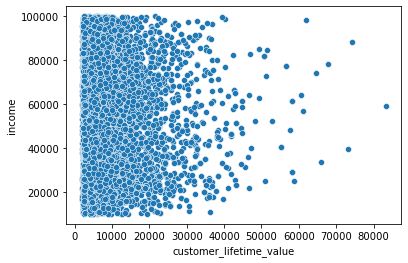

In [176]:
#Use seaborn library to construct distribution plots for the numerical variables

sns.scatterplot(x=numerical['customer_lifetime_value'],y=numerical['income'])



<AxesSubplot:xlabel='income', ylabel='monthly_premium_auto'>

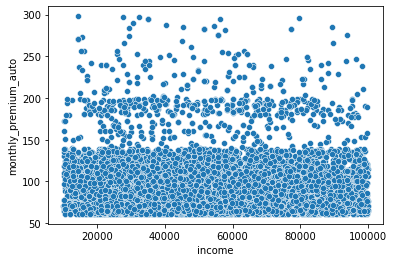

In [177]:
sns.scatterplot(x=numerical['income'],y=numerical['monthly_premium_auto'])


<AxesSubplot:xlabel='income', ylabel='number_of_policies'>

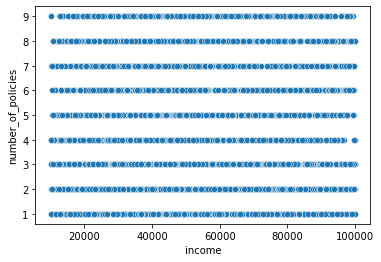

In [178]:
sns.scatterplot(x=numerical['income'],y=numerical['number_of_policies'])


<AxesSubplot:xlabel='income', ylabel='months_since_policy_inception'>

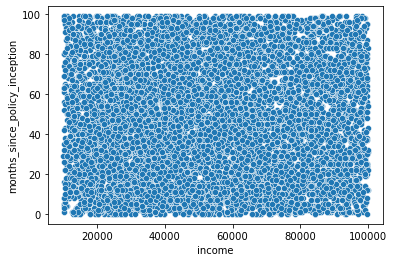

In [179]:
sns.scatterplot(x=numerical['income'],y=numerical['months_since_policy_inception'])


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='months_since_last_claim'>

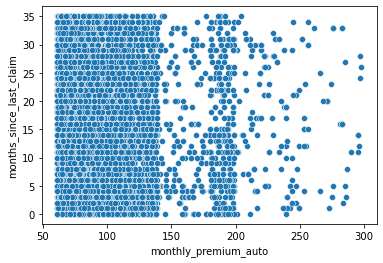

In [180]:
sns.scatterplot(x=numerical['monthly_premium_auto'],y=numerical['months_since_last_claim'])


<AxesSubplot:xlabel='customer_lifetime_value', ylabel='total_claim_amount'>

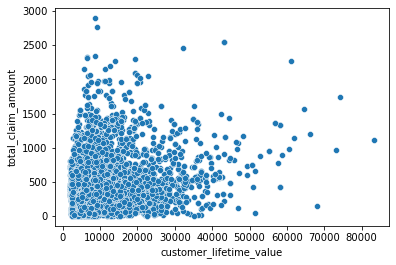

In [181]:
sns.scatterplot(x=numerical['customer_lifetime_value'],y=numerical['total_claim_amount'])


<AxesSubplot:xlabel='income', ylabel='monthly_premium_auto'>

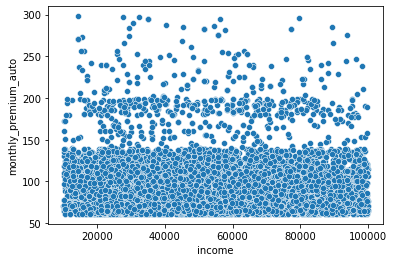

In [182]:
sns.scatterplot(x=numerical['income'],y=numerical['monthly_premium_auto'])



#sns.displot(dataframe.column)

In [184]:
numericals

NameError: name 'numericals' is not defined

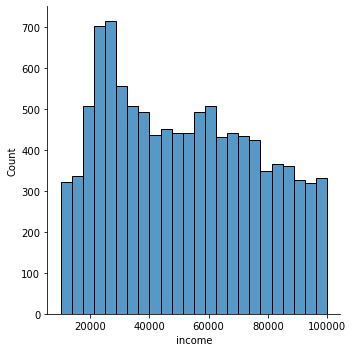

In [188]:
sns.displot(numerical['income'])


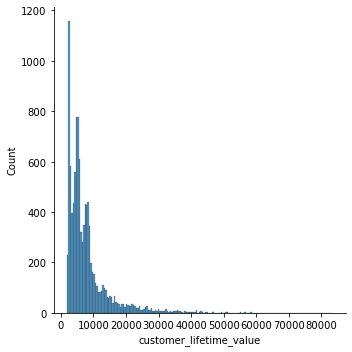

In [185]:
sns.displot(numerical['customer_lifetime_value'])

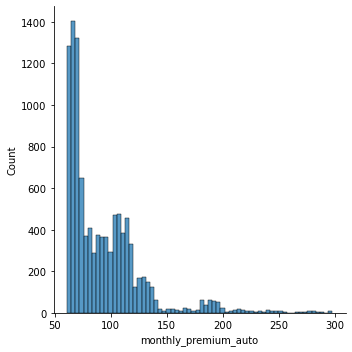

In [189]:
sns.displot(numerical['monthly_premium_auto'])



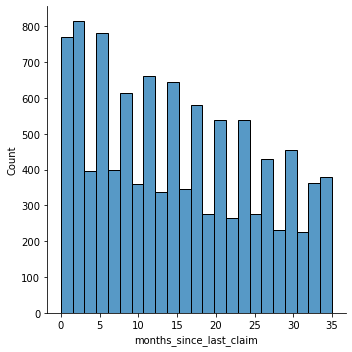

In [191]:
sns.displot(numerical['months_since_last_claim'])


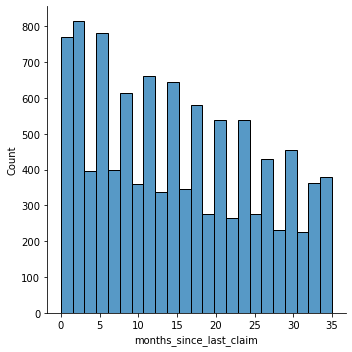

In [194]:
sns.displot(numerical['months_since_last_claim'])


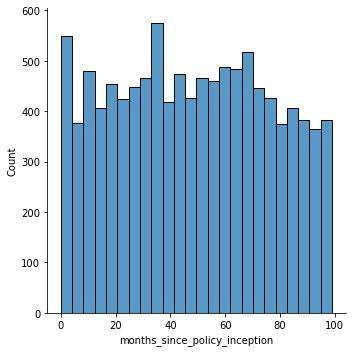

In [195]:
sns.displot(numerical['months_since_policy_inception'])



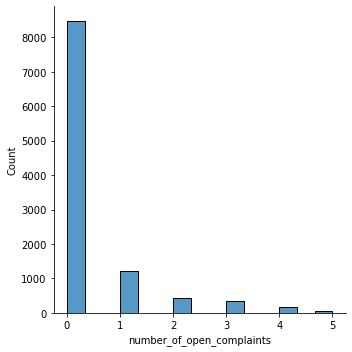

In [197]:
sns.displot(numerical['number_of_open_complaints'])


In [201]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


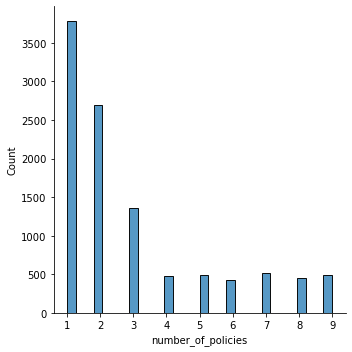

In [203]:
sns.displot(numerical['number_of_policies'])


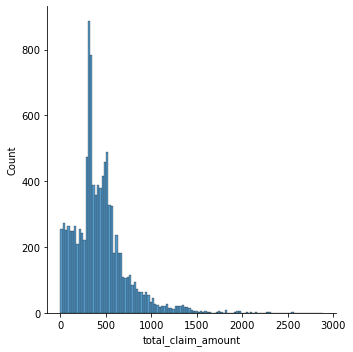

In [204]:
sns.displot(numerical['total_claim_amount'])

<AxesSubplot:>

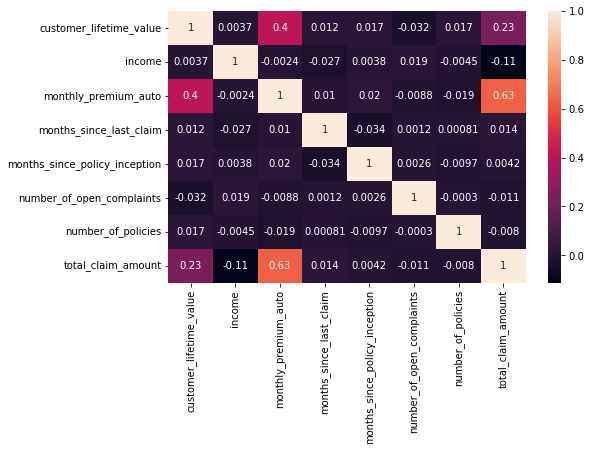

In [205]:
fig=plt.figure(figsize=(8,5))
sns.heatmap(numerical.corr(),annot=True)#NAN affect the heatmap. need to remove NANs?

In [206]:
numerical.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


In [208]:
#Do the distributions for different numerical variables look like a normal distribution? 
print('yes')

yes


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

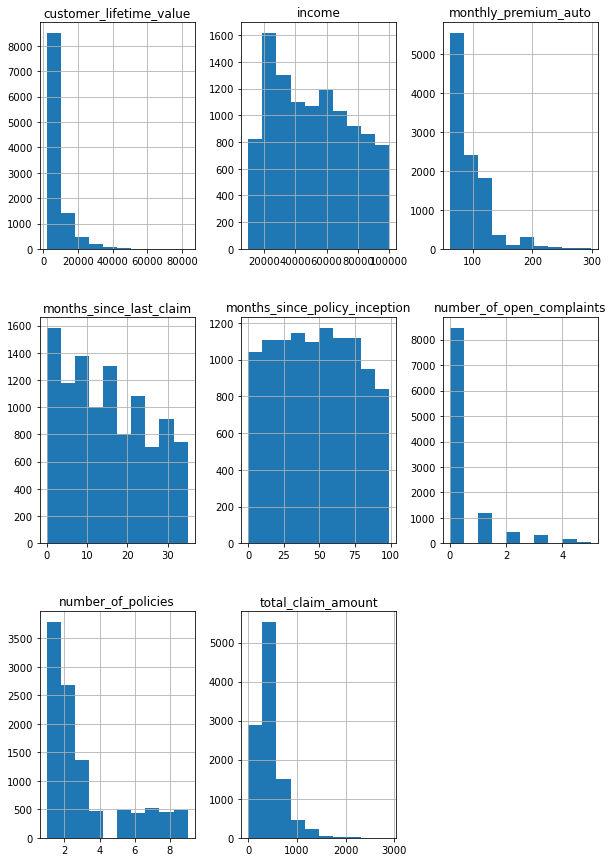

In [207]:
numerical.hist(figsize=(10,15))
